In [57]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

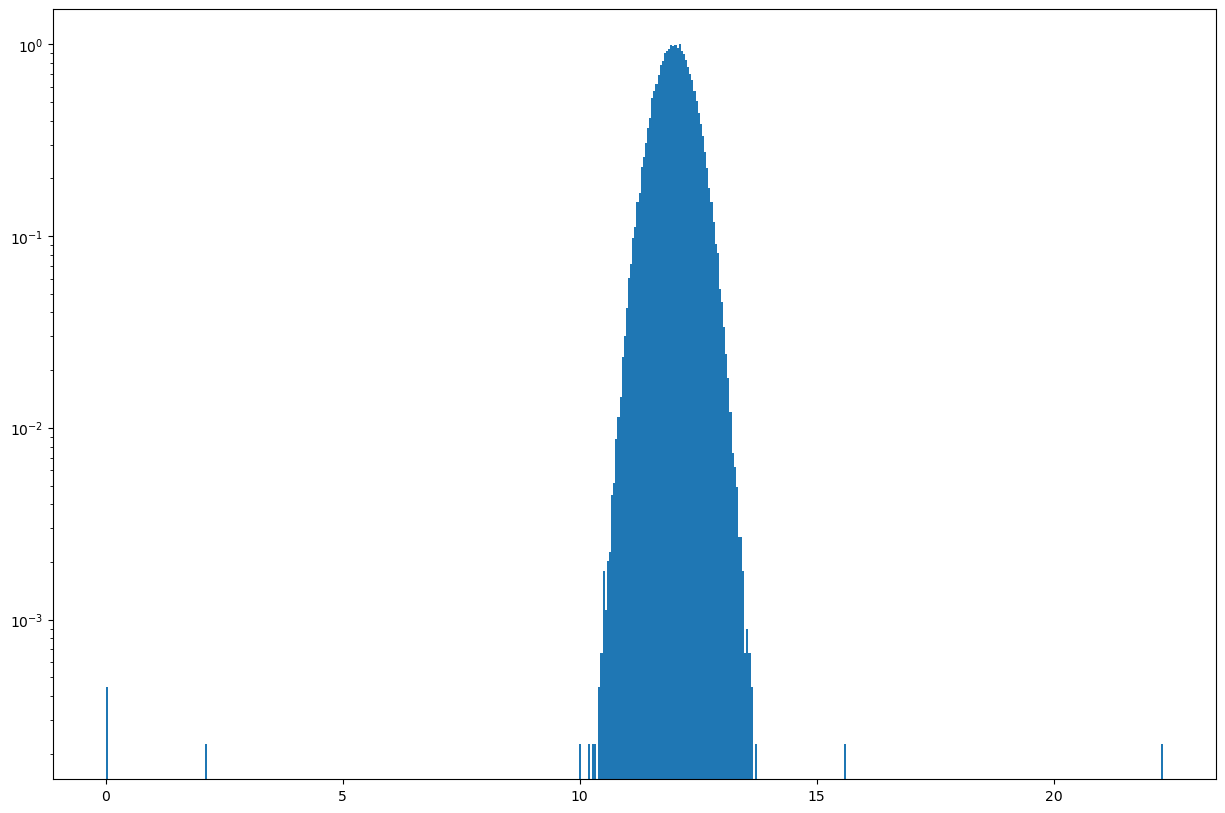

In [58]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.tick_params(labelsize = 10)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

A) So our goal is to identify bad data and throw it out.

1. Start by exploring the data you have created with appropriate plots
2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
3. Restate your question in math. Be very clear.
4. Apply your statistical test and construct a truth table.

---

1. see above
2. The vast majority of good data will be within 4.5 sigma of the mean. My question is: Is the percentage of bad data thrown out when I set a threshold of 4.5 sigma high enough compared to the percentage of good data thrown out for this to be a good threshold?
3. $\pm$ 4.5 sigma = mean of our distribution $-$ PPF of our distribution at probability = CDF(5) of the normal distribution. After calculating this, %thrown out = sum(number of values outside $\pm$ 4.5 sigma)/(total data points)

Percentage of good data thrown out is 

In [60]:
def truth_table(sigma):
    prob = stats.norm.cdf(sigma)
    threshold = stats.norm.ppf(prob,loc = 12, scale = 0.4)
    
    threshold = threshold - 12
    
    np.random.seed(seed=153954)

    true_data = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
    false_data = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
    
    throw_away_true = 0
    for val in true_data:
        if val <= (12-threshold) or val >= (12+threshold):
            throw_away_true += 1
    
    throw_away_false = 0
    for val in false_data:
        if val <= (12-threshold) or val >= (12+threshold):
                throw_away_false += 1
                
    good_tossed = throw_away_true
    good_kept = len(true_data) - good_tossed
    
    bad_tossed = throw_away_false
    bad_kept = len(false_data) - bad_tossed
    
    data = ['Your Test Good',good_kept,good_tossed],['Your Test Bad',bad_tossed,bad_kept]
    table = pd.DataFrame(data=data,columns=['','True T','Bad T'])
    
    return table

In [78]:
truth_table(0.2)

,,True T,Bad T
0,Your Test Good,15716,84284
1,Your Test Bad,8,0


# Problem 2

1. What distance in arcseconds does an object need to move to determine that it is an asteroid moving, and not random variation in the position of a star due to atmospheric effects?
2. The magnitude of two Gaussians in the same as a Rayleigh distribution with $\sigma_{Rayleigh} = \sqrt{\sigma_{gaussian}}$

In [73]:
prob = stats.norm.cdf(5)
prob

0.9999997133484281

In [74]:
stats.rayleigh.ppf(prob)

5.489079776034238